In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline
import VersionZeroPointZero as PSS
from scipy import signal

I incorporated your changes, but there were a few typos that I fixed. Some of the pulsar_object and signal_object calls were mixed up, and the syntax for creating the dictionary was incorrect I think.

In [3]:
def DMBroaden(pulsar_object, signal_object, to_DM_Broaden=True):
    dm_widths = np.zeros(pulsar_object.Nf)
    for ii, freq in enumerate(pulsar_object.Signal_in.freq_Array):
        sub_band_width = pulsar_object.bw/pulsar_object.Nf
        width = int(PSS.utils.top_hat_width(sub_band_width, freq, signal_object.MetaData.DM)//pulsar_object.TimeBinSize)
        if width > pulsar_object.Nt:
            raise ValueError('Too Much DM! Dispersion broadening top hat wider than data array!')
        dm_widths[ii] = width
        pulsar_object.profile[ii,:] = sp.convolve(pulsar_object.profile[ii,:], signal.boxcar(width)/width,'same')
    Dict = {'dm_widths':dm_widths}
    signal_object.MetaData.AddInfo(Dict)

Initializing signal, pulse, and ISM.

In [4]:
S1=PSS.Signal(Nt=2000)
P1=PSS.Pulsar(S1)
I1=PSS.ism.ISM(S1)
PSS.ism.ISM.finalize_ism(I1)

Just specifying the gaussians to make the plots in this notebook nicer, that way the broadening is more obvious.

In [5]:
peak3 = np.random.randn(20*3)*0.01 + 0.2
width3 = abs(np.random.randn(20*3)*0.002 +0.012)
amp3 = np.random.randn(20*3)**2
peak3.resize(20,3)
width3.resize(20,3)
amp3.resize(20,3)
P1.gauss_template(peak=peak3,width=width3,amp=amp3)

In [6]:
DMBroaden(P1,S1) #Running the method. Make sure to include both the pulse and the signal.

In [7]:
P1.make_pulses()

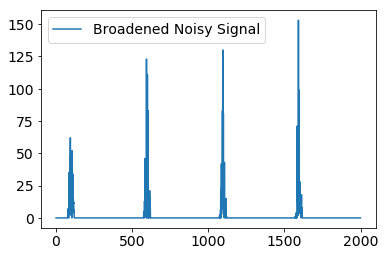

In [8]:
plt.plot(P1.signal[5],label="Broadened Noisy Signal")
plt.legend()
plt.show()